# Geospatial Data with GeoPandas (Round 2)

Geopandas is a library built on pandas and matplotlib that is helpful for plotting static maps. 

In [31]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this tutorial we will view election data on various US maps. To start, we will download the **very official** election results table from https://en.wikipedia.org/wiki/2024_United_States_presidential_election : 

In [59]:
from urllib.request import urlopen
url = "https://en.wikipedia.org/wiki/2024_United_States_presidential_election"
page = urlopen(url)

html_bytes = page.read()
html = html_bytes.decode("utf-8")

tables = pd.read_html(html)

for t in tables:
    if "Trump/Vance Republican" in t:
        df = t
        break
df.head()

@supports(writing-mode:vertical-rl){.mw-parser-output .ts-vertical-header{line-height:1;max-width:1em;padding:0.4em;vertical-align:bottom;width:1em}html.client-js .mw-parser-output .sortable:not(.jquery-tablesorter) .ts-vertical-header:not(.unsortable),html.client-js .mw-parser-output .ts-vertical-header.headerSort{background-position:50%.4em;padding-right:0.4em;padding-top:21px}.mw-parser-output .ts-vertical-header.is-valign-top{vertical-align:top}.mw-parser-output .ts-vertical-header.is-valign-middle{vertical-align:middle}.mw-parser-output .ts-vertical-header.is-normal{font-weight:normal}.mw-parser-output .ts-vertical-header>*{display:inline-block;transform:rotate(180deg);writing-mode:vertical-rl}@supports(writing-mode:sideways-lr){.mw-parser-output .ts-vertical-header>*{transform:none;writing-mode:sideways-lr}}}State or district  \
  @supports(writing-mode:vertical-rl){.mw-parser-output .ts-vertical-header{line-height:1;max-width:1em;padding:0.4em;vertical-align:bottom;width:1em}html.client-js .mw-parser-output .sortable:not(.jquery-tablesorter) .ts-vertical-header:not(.unsortable),html.client-js .mw-parser-output .ts-vertical-header.headerSort{background-position:50%.4em;padding-right:0.4em;padding-top:21px}.mw-parser-output .ts-vertical-header.is-valign-top{vertical-align:top}.mw-parser-output .ts-vertical-header.is-valign-middle{vertical-align:middle}.mw-parser-output .ts-vertical-header.is-normal{font-weight:normal}.mw-parser-output .ts-vertical-header>*{display:inline-block;transform:rotate(180deg);writing-mode:vertical-rl}@supports(writing-mode:sideways-lr){.mw-parser-output .ts-vertical-header>*{transform:none;writing-mode:sideways-lr}}}State or district   
0                                       Alabama[569]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
1                                        Alaska[570]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
2                                       Arizona[571]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [80]:
# keep winner vote percents

vote_dict = {"NAME" : list(df[df.columns[0]]),
             "Percent (R)": list(df[df.columns[2]]),
             "Percent (D)": list(df[df.columns[5]])}
new_df = pd.DataFrame(vote_dict)

new_df.head()

,NAME,Percent (R),Percent (D)
0,Alabama[569],64.57%,34.10%
1,Alaska[570],54.54%,41.41%
2,Arizona[571],52.22%,46.69%
3,Arkansas[572],64.20%,33.56%
4,California[573],38.33%,58.47%


In [81]:
# Some minor cleaning 

new_df["NAME"] = new_df["NAME"].apply(lambda x:  str(x).split("[")[0])
new_df["NAME"] = new_df["NAME"].apply(lambda x:  str(x)[:-2] if "†" in x else x)

new_df["Percent (R)"] = new_df["Percent (R)"].apply(lambda x:  float(str(x)[:-1]) if "%" in x else x)
new_df["Percent (D)"] = new_df["Percent (D)"].apply(lambda x:  float(str(x)[:-1]) if "%" in x else x)

new_df = new_df[:-1]

new_df.head(60)

,NAME,Percent (R),Percent (D)
0,Alabama,64.57,34.1
1,Alaska,54.54,41.41
2,Arizona,52.22,46.69
3,Arkansas,64.2,33.56
4,California,38.33,58.47
5,Colorado,43.14,54.13
6,Connecticut,41.89,56.4
7,Delaware,41.79,56.49
8,District of Columbia,6.47,90.28
9,Florida,56.09,42.99


### Standard Map

State borders are defined in a `shape` file, found at https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
* We previously used R to convert this shape file to the Albers projection

In [82]:
# Read into GeoPandas
gdf = gpd.read_file("us_albers/us_albers.shp")

gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,2.515110e+10,6.979967e+09,"MULTIPOLYGON (((1722285.499 240378.638, 172532..."
1,19,01779785,0400000US19,19,IA,Iowa,00,1.446613e+11,1.084181e+09,"POLYGON ((-50588.826 591417.964, -46981.682 59..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5.045926e+09,1.399986e+09,"POLYGON ((1705277.992 431220.783, 1706136.968 ..."
3,39,01085497,0400000US39,39,OH,Ohio,00,1.058289e+11,1.026885e+10,"MULTIPOLYGON (((1081987.294 544758.004, 108461..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,1.158844e+11,3.394590e+09,"POLYGON ((1287711.752 486863.969, 1286266.04 4..."


We can get an initial plot of the United States:
* Note the projection and coordinate system used

<Axes: >

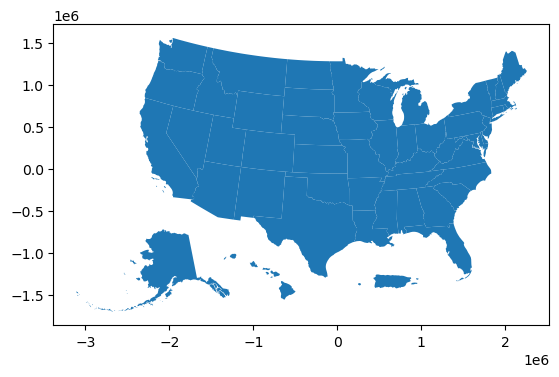

In [55]:
gdf.plot()

To create our first election map, we will join in the vote percents to the GeoPandas data frame:

In [83]:
# Join tables

gdf_merged = pd.merge(gdf, new_df, on='NAME', how='left')
gdf_merged = gdf_merged[:-1] # Sorry, Puerto Rico
gdf_merged.head(60)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Percent (R),Percent (D)
0,24,01714934,0400000US24,24,MD,Maryland,00,2.515110e+10,6.979967e+09,"MULTIPOLYGON (((1722285.499 240378.638, 172532...",34.08,62.62
1,19,01779785,0400000US19,19,IA,Iowa,00,1.446613e+11,1.084181e+09,"POLYGON ((-50588.826 591417.964, -46981.682 59...",55.73,42.52
2,10,01779781,0400000US10,10,DE,Delaware,00,5.045926e+09,1.399986e+09,"POLYGON ((1705277.992 431220.783, 1706136.968 ...",41.79,56.49
3,39,01085497,0400000US39,39,OH,Ohio,00,1.058289e+11,1.026885e+10,"MULTIPOLYGON (((1081987.294 544758.004, 108461...",55.14,43.93
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,1.158844e+11,3.394590e+09,"POLYGON ((1287711.752 486863.969, 1286266.04 4...",50.37,48.66
5,31,01779792,0400000US31,31,NE,Nebraska,00,1.989567e+11,1.371829e+09,"POLYGON ((-670097.365 433429.375, -668488.696 ...",59.32,38.86
6,53,01779804,0400000US53,53,WA,Washington,00,1.721126e+11,1.255928e+10,"MULTIPOLYGON (((-2000237.694 1535265.024, -198...",39.01,57.23
7,01,01779775,0400000US01,01,AL,Alabama,00,1.311740e+11,4.593327e+09,"POLYGON ((708460.493 -598742.69, 708113.978 -5...",64.57,34.1
8,05,00068085,0400000US05,05,AR,Arkansas,00,1.347689e+11,2.962860e+09,"POLYGON ((122656.347 -111221.392, 145436.831 -...",64.2,33.56
9,35,00897535,0400000US35,35,NM,New Mexico,00,3.141963e+11,7.287765e+08,"POLYGON ((-1226427.885 -553334.332, -1221959.3...",45.85,51.85


Now we will apply the Wikipedia US presidential election color scale to the votes
* See https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Elections_and_Referendums/USA_legend_colors

In [92]:
colors_D = {20: "#E1EFFF", 30: "#D3E7FF", 40: "#B9D7FF", 50: "#86B6F2", 60: "#4389E3", 70: "#1666CB", 80: "#0645B4", 90: "#002B84"}
colors_R = {20: "#FFDFE1", 30: "#FFCCD0", 40: "#F2B3BE", 50: "#E27F90", 60: "#CC2F4A", 70: "#D40000", 80: "#AA0000", 90: "#800000"}


colors_list = []
for i in range(len(gdf_merged)):
    if gdf_merged["Percent (R)"].iloc[i] > gdf_merged["Percent (D)"].iloc[i]:
        # color red
        val = int(gdf_merged["Percent (R)"].iloc[i] / 10) * 10 
        colors_list.append(colors_R[val])
    else: 
        # color blue
        val = int(gdf_merged["Percent (D)"].iloc[i] / 10) * 10 
        colors_list.append(colors_D[val])
gdf_merged["colors"] = colors_list
gdf_merged.head()


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Percent (R),Percent (D),colors
0,24,01714934,0400000US24,24,MD,Maryland,00,2.515110e+10,6.979967e+09,"MULTIPOLYGON (((1722285.499 240378.638, 172532...",34.08,62.62,#4389E3
1,19,01779785,0400000US19,19,IA,Iowa,00,1.446613e+11,1.084181e+09,"POLYGON ((-50588.826 591417.964, -46981.682 59...",55.73,42.52,#E27F90
2,10,01779781,0400000US10,10,DE,Delaware,00,5.045926e+09,1.399986e+09,"POLYGON ((1705277.992 431220.783, 1706136.968 ...",41.79,56.49,#86B6F2
3,39,01085497,0400000US39,39,OH,Ohio,00,1.058289e+11,1.026885e+10,"MULTIPOLYGON (((1081987.294 544758.004, 108461...",55.14,43.93,#E27F90
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,1.158844e+11,3.394590e+09,"POLYGON ((1287711.752 486863.969, 1286266.04 4...",50.37,48.66,#E27F90


Now we can view the results:

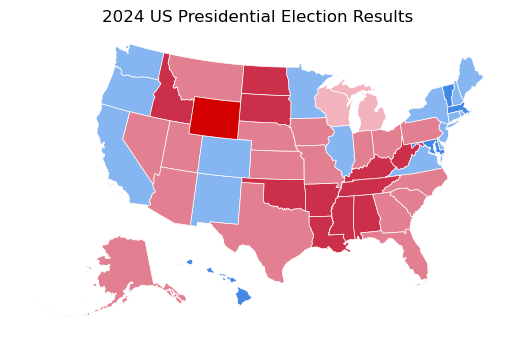

In [119]:
# Create the plot 
fig, ax = plt.subplots()
gdf_merged.plot(color=gdf_merged["colors"], ax = ax, linewidth=0.5, edgecolor="white")

ax.set_axis_off() # remove coordinates 

ax.set_title("2024 US Presidential Election Results")


plt.show()



For fun, we could also use a red-purple-blue color scale to highlight states that are more evenly split
* We will compute ratios of R to D votes for the color map

In [113]:
# Color scale generated with AI

import matplotlib.colors as mcolors

# Define the colors for the colormap
colors = ["red", "purple", "blue"]

# Create the colormap
red_purple_blue = mcolors.LinearSegmentedColormap.from_list("red_purple_blue", colors)

colors = []
for i in range(len(gdf_merged)):
    total = gdf_merged["Percent (R)"].iloc[i] + gdf_merged["Percent (D)"].iloc[i]
    ratio = gdf_merged["Percent (D)"].iloc[i] / total
    colors.append(red_purple_blue(ratio))
gdf_merged["purples"] = colors
gdf_merged.head(60)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Percent (R),Percent (D),colors,purples
0,24,01714934,0400000US24,24,MD,Maryland,00,2.515110e+10,6.979967e+09,"MULTIPOLYGON (((1722285.499 240378.638, 172532...",34.08,62.62,#4389E3,"(0.3543252595155709, 0.0, 0.6484429065743944, ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,1.446613e+11,1.084181e+09,"POLYGON ((-50588.826 591417.964, -46981.682 59...",55.73,42.52,#E27F90,"(0.570319108035371, 0.0, 0.43306420607458673, ..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5.045926e+09,1.399986e+09,"POLYGON ((1705277.992 431220.783, 1706136.968 ...",41.79,56.49,#86B6F2,"(0.42519031141868513, 0.0, 0.5781314878892734,..."
3,39,01085497,0400000US39,39,OH,Ohio,00,1.058289e+11,1.026885e+10,"MULTIPOLYGON (((1081987.294 544758.004, 108461...",55.14,43.93,#E27F90,"(0.5586005382545175, 0.0, 0.444875048058439, 1.0)"
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,1.158844e+11,3.394590e+09,"POLYGON ((1287711.752 486863.969, 1286266.04 4...",50.37,48.66,#E27F90,"(0.5117262591311034, 0.0, 0.4921184159938485, ..."
5,31,01779792,0400000US31,31,NE,Nebraska,00,1.989567e+11,1.371829e+09,"POLYGON ((-670097.365 433429.375, -668488.696 ...",59.32,38.86,#E27F90,"(0.6054748173779316, 0.0, 0.3976316801230296, ..."
6,53,01779804,0400000US53,53,WA,Washington,00,1.721126e+11,1.255928e+10,"MULTIPOLYGON (((-2000237.694 1535265.024, -198...",39.01,57.23,#86B6F2,"(0.4055055747789312, 0.0, 0.5976624375240293, ..."
7,01,01779775,0400000US01,01,AL,Alabama,00,1.311740e+11,4.593327e+09,"POLYGON ((708460.493 -598742.69, 708113.978 -5...",64.57,34.1,#CC2F4A,"(0.6562552864282969, 0.0, 0.3464513648596694, ..."
8,05,00068085,0400000US05,05,AR,Arkansas,00,1.347689e+11,2.962860e+09,"POLYGON ((122656.347 -111221.392, 145436.831 -...",64.2,33.56,#CC2F4A,"(0.6601614763552479, 0.0, 0.3425144175317186, ..."
9,35,00897535,0400000US35,35,NM,New Mexico,00,3.141963e+11,7.287765e+08,"POLYGON ((-1226427.885 -553334.332, -1221959.3...",45.85,51.85,#86B6F2,"(0.4724336793540946, 0.0, 0.5312572087658592, ..."


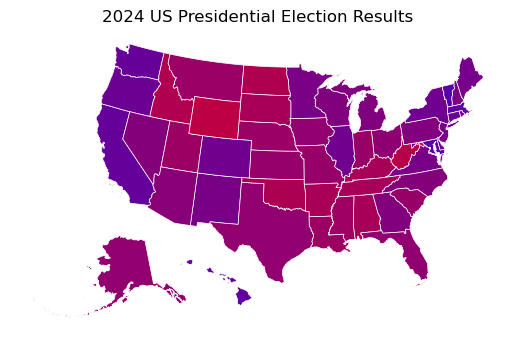

In [118]:

# Create the plot 
fig, ax = plt.subplots()
gdf_merged.plot(color=gdf_merged["purples"], ax = ax, linewidth=0.5, edgecolor="white")

ax.set_axis_off() # remove coordinates 

ax.set_title("2024 US Presidential Election Results")


plt.show()

### Contiguous Cartograms

We can follow the same steps as before to create a contiguous cartogram, just by starting with a different shape file:

In [124]:
# Load converted file from R

gdf_carto = gpd.read_file("us_albers_carto/us_albers_carto.shp")
gdf_carto = gdf_carto[gdf_carto["NAME"] != "Puerto Rico"]
gdf_carto.head(60)


,NAME,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,X,Population,geometry
0,Alabama,01,01779775,0400000US01,01,AL,00,1.311740e+11,4.593327e+09,23,5157699.0,"POLYGON ((314389.841 -530897.793, 313338.851 -..."
1,Alaska,02,01785533,0400000US02,02,AK,00,1.478840e+12,2.454816e+11,48,740133.0,"MULTIPOLYGON (((-2086421.344 -987453.102, -208..."
2,Arizona,04,01779777,0400000US04,04,AZ,00,2.941986e+11,1.027338e+09,13,7582384.0,"POLYGON ((-1553083.72 -291039.608, -1552155.43..."
3,Arkansas,05,00068085,0400000US05,05,AR,00,1.347689e+11,2.962860e+09,33,3088354.0,"POLYGON ((-309421.846 19036.458, -286634.423 1..."
4,California,06,01779778,0400000US06,06,CA,00,4.035039e+11,2.046387e+10,0,39431263.0,"MULTIPOLYGON (((-2134827.948 744487.51, -21156..."
5,Colorado,08,01779779,0400000US08,08,CO,00,2.684229e+11,1.181622e+09,20,5957493.0,"POLYGON ((-1097830.313 384045.41, -1093872.807..."
6,Connecticut,09,01779780,0400000US09,09,CT,00,1.254250e+10,1.815618e+09,28,3675069.0,"POLYGON ((1874055.839 685815.993, 1888872.142 ..."
7,Delaware,10,01779781,0400000US10,10,DE,00,5.045926e+09,1.399986e+09,45,1051917.0,"POLYGON ((1613662.905 432050.289, 1609451.443 ..."
8,District of Columbia,11,01702382,0400000US11,11,DC,00,1.583404e+08,1.868720e+07,49,702250.0,"POLYGON ((1405010.579 239876.915, 1442065.869 ..."
9,Florida,12,00294478,0400000US12,12,FL,00,1.389491e+11,3.136110e+10,2,23372215.0,"MULTIPOLYGON (((427238.409 -645020.029, 424922..."


<Axes: >

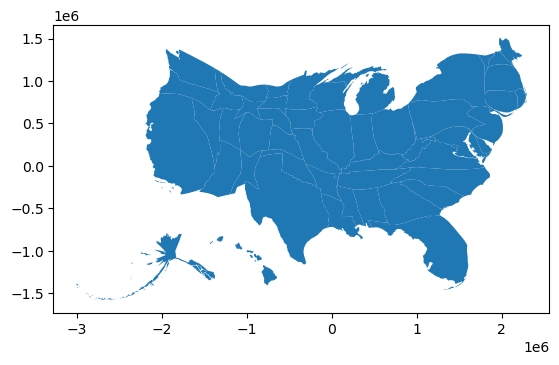

In [125]:
gdf_carto.plot()

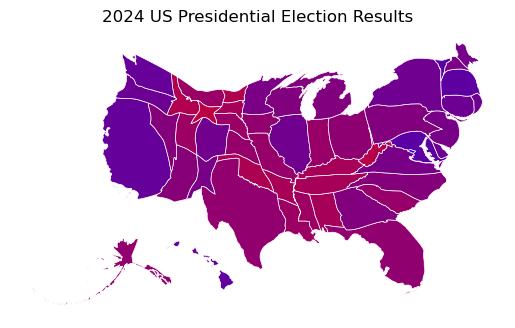

In [126]:
# Merge election results
gdf_carto_merged = pd.merge(gdf_carto, new_df, on='NAME', how='left')

# Plot with purple scale: 

colors = []
for i in range(len(gdf_carto_merged)):
    total = gdf_carto_merged["Percent (R)"].iloc[i] + gdf_carto_merged["Percent (D)"].iloc[i]
    ratio = gdf_carto_merged["Percent (D)"].iloc[i] / total
    colors.append(red_purple_blue(ratio))
gdf_carto_merged["purples"] = colors

# Create the plot 
fig, ax = plt.subplots()
gdf_carto_merged.plot(color=gdf_carto_merged["purples"], ax = ax, linewidth=0.5, edgecolor="white")

ax.set_axis_off() # remove coordinates 

ax.set_title("2024 US Presidential Election Results")


plt.show()

### Non-Contiguous Cartograms

Let's get a different view of the country by once again scaling each state by population. This time, however, we will keep the actual state shapes and just resize them by total population. 

To start, we will grab the current state population estimates from Wikipedia:

In [150]:
url = "https://www.archives.gov/electoral-college/2024"
page = urlopen(url)

html_bytes = page.read()
html = html_bytes.decode("utf-8")

tables = pd.read_html(html)

for t in tables:
    if "State" in t:
        df = t
        break
        
df = df[1:-2] # slice header and footers

# Keep state names and electoral votes
new_dict = {"NAME": list(df[df.columns[0]]), 
            "Votes": list(df[df.columns[1]])}

votes_df = pd.DataFrame(new_dict)

def is_convertible_to_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

# remove footnotes on state names
votes_df["NAME"] = votes_df["NAME"].apply(lambda x: x[:-1].strip() if is_convertible_to_int(x[-1]) else x.strip())
votes_df["Votes"] = votes_df["Votes"].apply(lambda x: int(x))

votes_df.head(60)


,NAME,Votes
0,Alabama,9
1,Alaska,3
2,Arizona,11
3,Arkansas,6
4,California,54
5,Colorado,10
6,Connecticut,7
7,Delaware,3
8,District of Columbia,3
9,Florida,30


Next we can merge the electoral votes data into our GeoPandas data frame: 

In [151]:
# Read into GeoPandas
gdf = gpd.read_file("us_albers/us_albers.shp")
gdf = gdf[gdf["NAME"] != "Puerto Rico"]
gdf = pd.merge(gdf, votes_df, on='NAME', how='left')

gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Votes
0,24,01714934,0400000US24,24,MD,Maryland,00,2.515110e+10,6.979967e+09,"MULTIPOLYGON (((1722285.499 240378.638, 172532...",10
1,19,01779785,0400000US19,19,IA,Iowa,00,1.446613e+11,1.084181e+09,"POLYGON ((-50588.826 591417.964, -46981.682 59...",6
2,10,01779781,0400000US10,10,DE,Delaware,00,5.045926e+09,1.399986e+09,"POLYGON ((1705277.992 431220.783, 1706136.968 ...",3
3,39,01085497,0400000US39,39,OH,Ohio,00,1.058289e+11,1.026885e+10,"MULTIPOLYGON (((1081987.294 544758.004, 108461...",17
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,1.158844e+11,3.394590e+09,"POLYGON ((1287711.752 486863.969, 1286266.04 4...",19


Now we can compute the scale values for each state based on their area and number of electoral votes:

<Axes: >

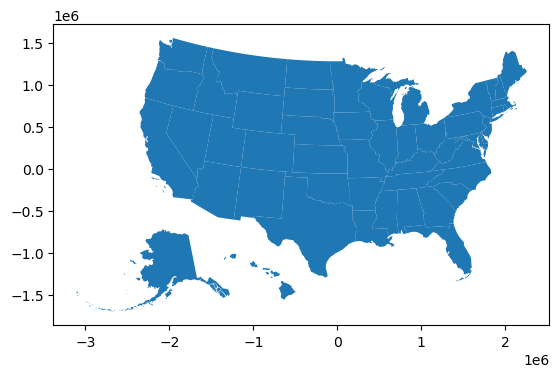

In [210]:
import numpy as np

areas = list(gdf.area)

### Use California's proportion of area to electoral votes as the base
# base_ratio = float(gdf[gdf["NAME"] == "California"].area / 54)

### Use average proportion of area to electoral votes as the base
ratios = [areas[i] / gdf["Votes"].iloc[i] for i in range(len(areas))]
ratios.sort()
base_ratio = ratios[25]

scales = []
for i in range(len(gdf)):
    electoral_area = gdf["Votes"].iloc[i] * base_ratio
    # compare against actual area
    scale_val = electoral_area / areas[i]
    scales.append(scale_val)
    
gdf["Scale"] = scales
    
gdf.plot()

<Axes: >

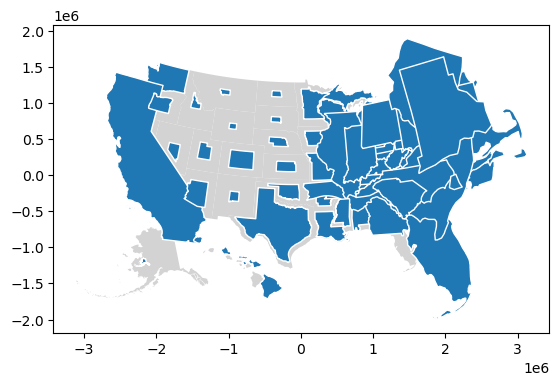

In [211]:
scaled_states = []

for i in range(len(gdf)):
    state_name = str(gdf["NAME"].iloc[i])  
    
    cur_state = gdf[gdf["NAME"] == state_name]["geometry"]
    new_state = cur_state.scale(xfact=scales[i], yfact=scales[i])
    scaled_states.append(new_state.iloc[0])
        
scaled_gdf = gdf.copy()    
scaled_gdf["geometry"] = scaled_states

# Plot
fig, ax = plt.subplots()

gdf.plot(ax = ax, color="lightgray")
scaled_gdf[scaled_gdf["NAME"] != "District of Columbia"].plot(ax = ax, edgecolor="white")


Some states may need to be moved around manually to avoid overlap
* See https://engaging-data.com/sizing-states-electoral/ for an example

### Tile Maps in Python

Creating a map with square tiles is relatively straightforward. You get to decide on the grid layout (using `subplots`) and label them accordingly: 
* See https://python-graph-gallery.com/web-stacked-area-charts-on-a-map/

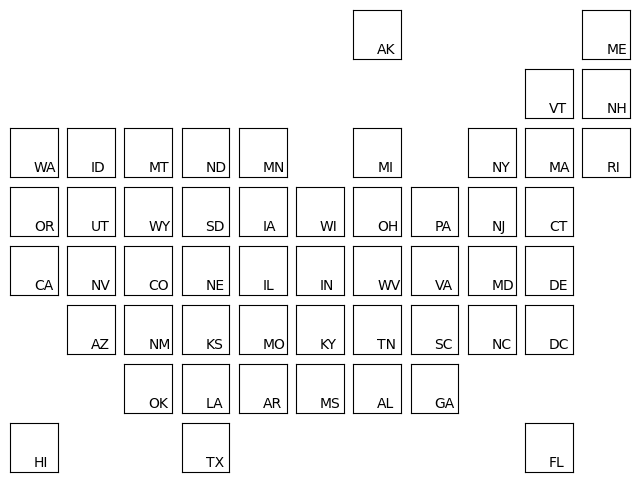

In [212]:
# Create a figure with 8x11 axes
nrows, ncols = 8, 11
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(8, 6))

# define positions of rows that we want off
rows_to_remove = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5),        (0,7), (0,8), (0,9), 
                  (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), 
                                                     (2,5),        (2,7), 
                                                                                        (3,10), 
                                                                                        (4,10), 
                  (5,0),                                                                (5,10), 
                  (6,0), (6,1),                                           (6,8), (6,9), (6,10), 
                         (7,1), (7,2),        (7,4), (7,5), (7,6), (7,7), (7,8),        (7,10)]

# define first letters of each state
letters_state = ['AK', 'ME', 'VT', 'NH', 'WA', 'ID', 'MT', 'ND', 'MN', 'MI', 'NY',
                 'MA', 'RI', 'OR', 'UT', 'WY', 'SD', 'IA', 'WI', 'OH', 'PA',
                 'NJ', 'CT', 'CA', 'NV', 'CO', 'NE', 'IL', 'IN', 'WV', 'VA',
                 'MD', 'DE', 'AZ', 'NM', 'KS', 'MO', 'KY', 'TN', 'SC', 'NC',
                 'DC', 'OK', 'LA', 'AR', 'MS', 'AL', 'GA', 'HI', 'TX', 'FL']

# Iteare over each ax
state = 0
for row in range(nrows):
    for col in range(ncols):
        
        # test the presence of the current ax in the list defined above
        if (row, col) in rows_to_remove:
            axs[row, col].axis('off')
        
        # all axes we want to keep
        else:
            
            # Remove axis labels
            axs[row, col].set_xticks([])
            axs[row, col].set_yticks([])
            
            # add state's letters
            letters = letters_state[state]
            axs[row, col].annotate(letters, xy=(0.5, 0.1),
                                   xycoords='axes fraction')
            state += 1


# Display the plot
plt.show()

Now we can color each square with our election data:

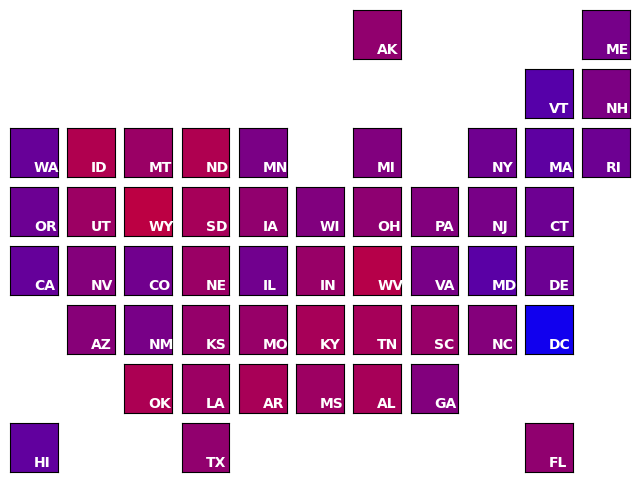

In [215]:
# Create a figure with 8x11 axes
nrows, ncols = 8, 11
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(8, 6))

# define positions of rows that we want off
rows_to_remove = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5),        (0,7), (0,8), (0,9), 
                  (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), 
                                                     (2,5),        (2,7), 
                                                                                        (3,10), 
                                                                                        (4,10), 
                  (5,0),                                                                (5,10), 
                  (6,0), (6,1),                                           (6,8), (6,9), (6,10), 
                         (7,1), (7,2),        (7,4), (7,5), (7,6), (7,7), (7,8),        (7,10)]

# define first letters of each state
letters_state = ['AK', 'ME', 'VT', 'NH', 'WA', 'ID', 'MT', 'ND', 'MN', 'MI', 'NY',
                 'MA', 'RI', 'OR', 'UT', 'WY', 'SD', 'IA', 'WI', 'OH', 'PA',
                 'NJ', 'CT', 'CA', 'NV', 'CO', 'NE', 'IL', 'IN', 'WV', 'VA',
                 'MD', 'DE', 'AZ', 'NM', 'KS', 'MO', 'KY', 'TN', 'SC', 'NC',
                 'DC', 'OK', 'LA', 'AR', 'MS', 'AL', 'GA', 'HI', 'TX', 'FL']

# Iteare over each ax
state = 0
for row in range(nrows):
    for col in range(ncols):
        
        # test the presence of the current ax in the list defined above
        if (row, col) in rows_to_remove:
            axs[row, col].axis('off')
        
        # all axes we want to keep
        else:
            
            # Remove axis labels
            axs[row, col].set_xticks([])
            axs[row, col].set_yticks([])
            
            # add state's letters
            letters = letters_state[state]
            axs[row, col].annotate(letters, xy=(0.5, 0.1),
                                   xycoords='axes fraction', color="white", fontweight="bold")
            
            # Add color
            axs[row, col].set_facecolor(gdf_merged[gdf_merged["STUSPS"] == letters]["purples"].iloc[0])
            
            
            state += 1
            
            


# Display the plot
plt.show()

To create a tile map using hexagons, we have to work a little harder. Fortunately others have already done the hard work of defining the shape boundaries in a `geojson` file:

In [229]:
# Load file
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
geoData = gpd.read_file(url)
geoData.head()


,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry
0,1219,2015-05-13 22:26:15+00:00,2015-10-05 16:00:16+00:00,Maine,60.5,ME,Maine (United States),"POLYGON ((-72.62574 55.3132, -69.90286 54.4084..."
1,1217,2015-05-13 22:24:35+00:00,2015-10-05 16:00:16+00:00,R.I.,47.8,RI,Rhode Island (United States),"POLYGON ((-72.62574 49.57439, -69.90286 48.544..."
2,1218,2015-05-13 22:25:00+00:00,2015-10-05 16:00:16+00:00,Vt.,33.9,VT,Vermont (United States),"POLYGON ((-80.79436 52.53744, -78.07148 51.570..."
3,231,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Okla.,63.4,OK,Oklahoma (United States),"POLYGON ((-110.74597 35.79821, -108.02309 34.5..."
4,244,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,N.C.,41.5,NC,North Carolina (United States),"POLYGON ((-91.68585 39.5301, -88.96298 38.3070..."


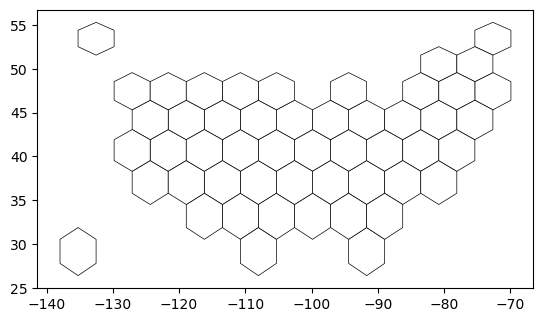

In [218]:
geoData.plot(color="white", edgecolor='black', linewidth=.5);


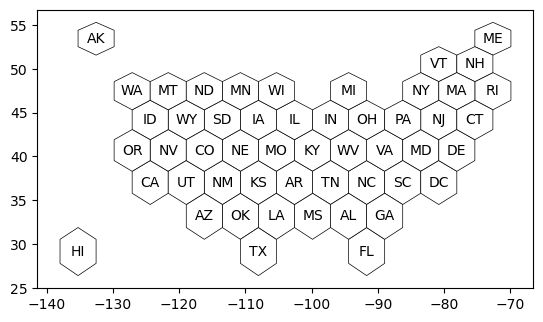

In [225]:
fix, ax = plt.subplots()

geoData.plot(ax = ax, color="white", edgecolor='black', linewidth=.5);

# for each county, annotate with the county name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    ax.annotate(text=row['iso3166_2'], xy=[row["geometry"].centroid.x, row["geometry"].centroid.y], ha='center', va='center')
    
plt.show()

In [230]:
geoData = geoData.rename(columns={"iso3166_2": "STUSPS"})
geoData.head()

,cartodb_id,created_at,updated_at,label,bees,STUSPS,google_name,geometry
0,1219,2015-05-13 22:26:15+00:00,2015-10-05 16:00:16+00:00,Maine,60.5,ME,Maine (United States),"POLYGON ((-72.62574 55.3132, -69.90286 54.4084..."
1,1217,2015-05-13 22:24:35+00:00,2015-10-05 16:00:16+00:00,R.I.,47.8,RI,Rhode Island (United States),"POLYGON ((-72.62574 49.57439, -69.90286 48.544..."
2,1218,2015-05-13 22:25:00+00:00,2015-10-05 16:00:16+00:00,Vt.,33.9,VT,Vermont (United States),"POLYGON ((-80.79436 52.53744, -78.07148 51.570..."
3,231,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Okla.,63.4,OK,Oklahoma (United States),"POLYGON ((-110.74597 35.79821, -108.02309 34.5..."
4,244,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,N.C.,41.5,NC,North Carolina (United States),"POLYGON ((-91.68585 39.5301, -88.96298 38.3070..."


In [231]:
color_scheme = gdf_merged[["STUSPS", "purples"]]
color_scheme.head()

,STUSPS,purples
0,MD,"(0.3543252595155709, 0.0, 0.6484429065743944, ..."
1,IA,"(0.570319108035371, 0.0, 0.43306420607458673, ..."
2,DE,"(0.42519031141868513, 0.0, 0.5781314878892734,..."
3,OH,"(0.5586005382545175, 0.0, 0.444875048058439, 1.0)"
4,PA,"(0.5117262591311034, 0.0, 0.4921184159938485, ..."


In [232]:
# Merge into geoData

geoData = pd.merge(geoData, color_scheme, on = "STUSPS", how="left")

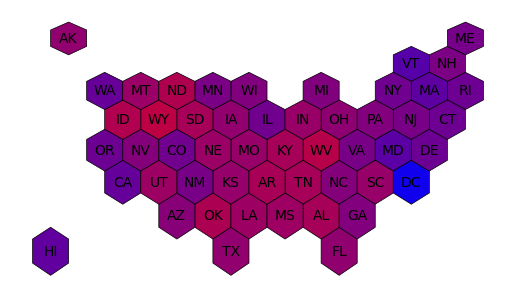

In [233]:
fix, ax = plt.subplots()

geoData.plot(ax = ax, color=geoData["purples"], edgecolor='black', linewidth=.5);

# for each county, annotate with the county name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    ax.annotate(text=row['STUSPS'], xy=[row["geometry"].centroid.x, row["geometry"].centroid.y], ha='center', va='center')
    
ax.set_axis_off()    
    
plt.show()